<a href="https://colab.research.google.com/github/RodMendez/Estad-stica/blob/main/An%C3%A1lisis_exploratorio_Dataset_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

# Cargar el dataset
data = pd.read_csv("Dataset completo.csv", usecols=['Name', 'R X-ray', 'nelec', 'neerr', 'Tx', 'Txerr ', 'Kitpl', 'Dvel', 'Rvir', 'Mvir', 'A', 'Hz', 'R500 (Mpc)', 'R500 fracc'])
print(data.columns)


Index(['Name', 'R X-ray', 'nelec', 'neerr', 'Tx', 'Txerr ', 'Kitpl', 'Dvel',
       'Rvir', 'Mvir', 'A', 'Hz', 'R500 (Mpc)', 'R500 fracc'],
      dtype='object')


In [3]:
# Obtener información general del dataset
print("\nInformación general del dataset:")
print(data.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        34 non-null     object 
 1   R X-ray     34 non-null     float64
 2   nelec       34 non-null     float64
 3   neerr       34 non-null     float64
 4   Tx          34 non-null     float64
 5   Txerr       34 non-null     float64
 6   Kitpl       34 non-null     float64
 7   Dvel        34 non-null     int64  
 8   Rvir        34 non-null     float64
 9   Mvir        34 non-null     float64
 10  A           34 non-null     object 
 11  Hz          34 non-null     float64
 12  R500 (Mpc)  34 non-null     float64
 13  R500 fracc  34 non-null     float64
dtypes: float64(11), int64(1), object(2)
memory usage: 3.8+ KB
None


In [4]:
# Ver las primeras filas
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
                         Name  R X-ray     nelec     neerr    Tx  Txerr   \
0  ABELL_0085                    0.251  0.002660  0.000178  7.51   0.427   
1  ABELL_0119                    0.283  0.001010  0.000637  5.73   0.731   
2  ABELL_0133                    0.138  0.003380  0.000183  4.55   0.183   
3  ABELL_0399                    0.335  0.001210  0.000161  6.73   0.608   
4  ABELL_0400                    0.195  0.000837  0.000045  2.12   0.148   

   Kitpl  Dvel   Rvir   Mvir  A     Hz  R500 (Mpc)  R500 fracc  
0  388.0  1045  2.668  20.20  S  16.26      1.2103     0.36309  
1  536.0   853  2.082   9.51  S  15.77      0.9413     0.28239  
2  195.0   778  1.899   7.30  S  15.55      0.9379     0.28137  
3  592.0   950  2.209  11.70  U  16.07      1.1169     0.33507  
4  253.0   343  0.870   0.68  S  13.47      0.6505     0.19515  


In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
         R X-ray      nelec         neerr          Tx     Txerr        Kitpl  \
count  34.000000  34.000000  3.400000e+01   34.000000  34.000000   34.000000   
mean    0.244371   0.015348  6.120931e-04    9.812941   0.752174  344.646471   
std     0.100455   0.056790  2.570041e-03   26.428910   1.454422  219.691824   
min     0.056100   0.000670  5.650000e-07    2.120000   0.070000    0.780000   
25%     0.173000   0.001237  7.930000e-05    3.990000   0.207750  183.000000   
50%     0.270000   0.001620  1.115000e-04    5.430000   0.439500  329.000000   
75%     0.318000   0.004070  1.817500e-04    6.567500   0.723000  509.750000   
max     0.419000   0.321000  1.510000e-02  159.000000   8.740000  849.000000   

              Dvel       Rvir       Mvir         Hz  R500 (Mpc)  R500 fracc  
count    34.000000  34.000000  34.000000  34.000000   34.000000   34.000000  
mean    842.764706   2.039000  10.201176  15.671471    1.024968    0.307490  
std     194.80760


Distribución de Name:


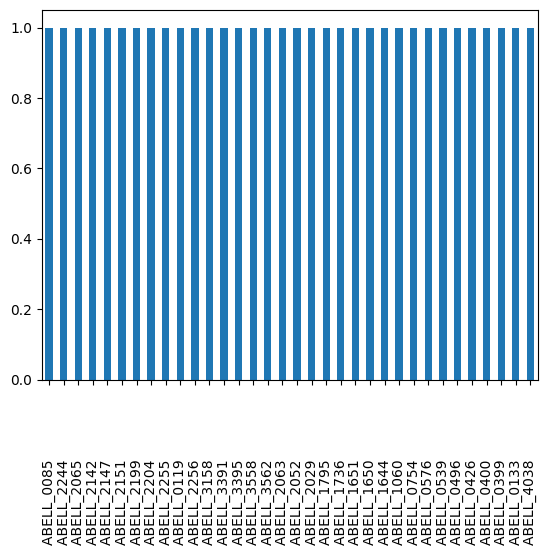


Distribución de A:


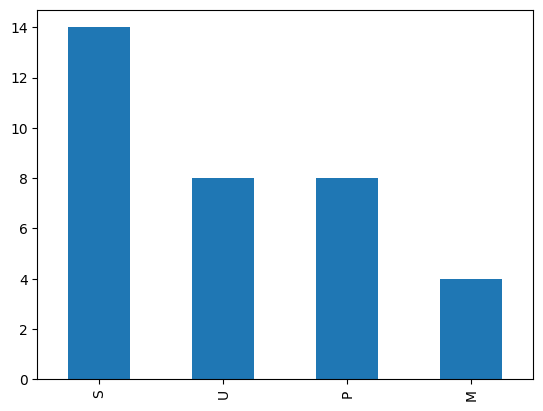

In [6]:
# Análisis de variables categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    data[col].value_counts().plot(kind='bar')
    plt.show()


Distribución de variables numéricas:


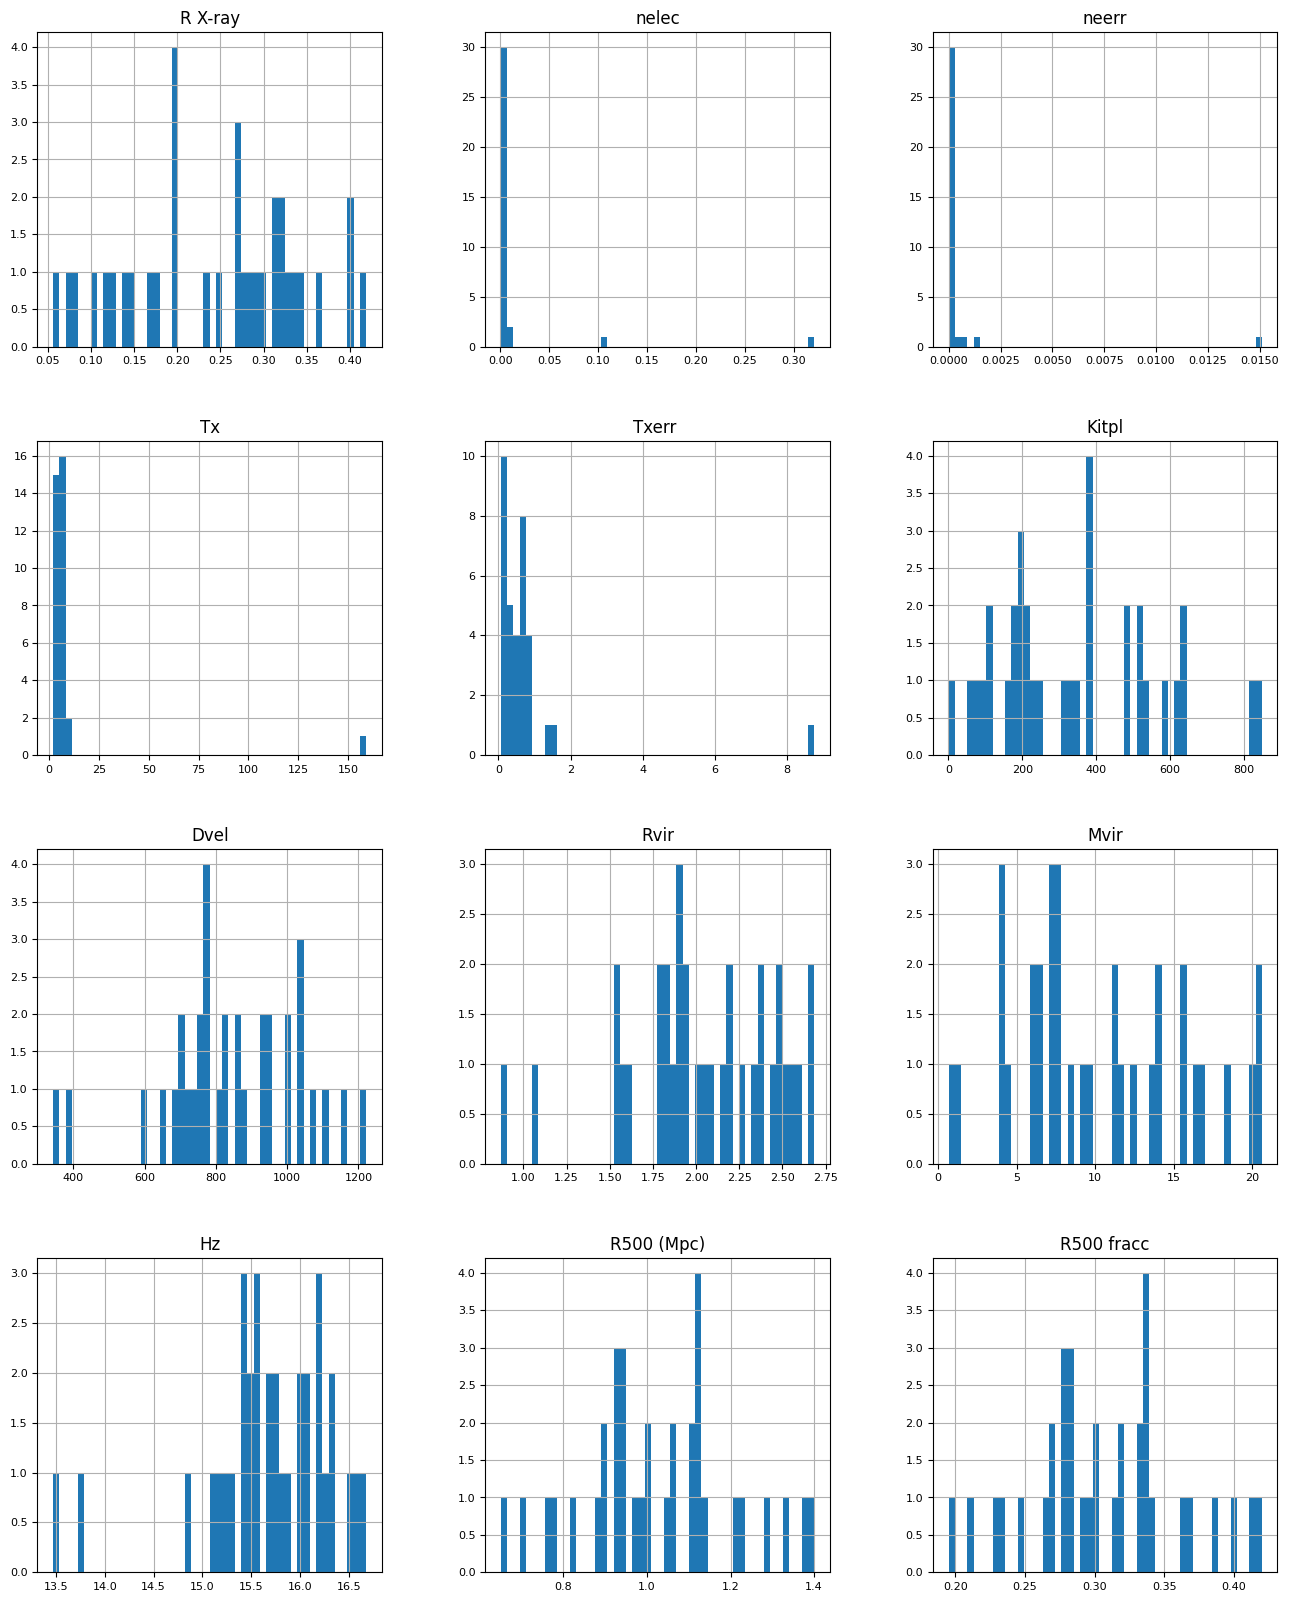

In [7]:
# Distribución de cada variable
print("\nDistribución de variables numéricas:")
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()


Matriz de correlación:


<ipython-input-8-f3f3623ff87c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


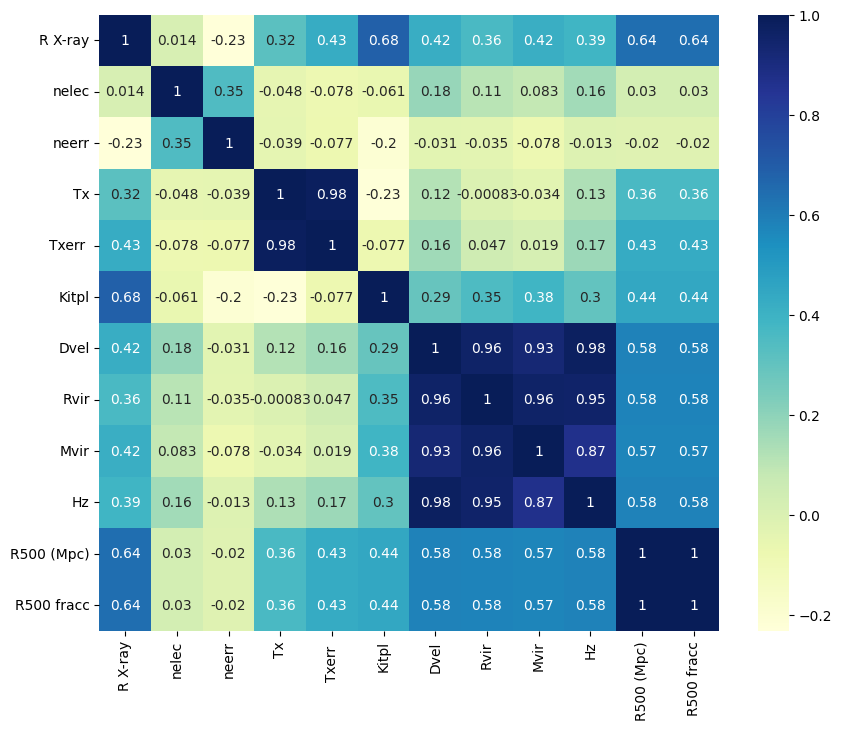

In [8]:
# Matriz de correlación
print("\nMatriz de correlación:")
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
# Análisis de subgrupos
categorical_col = 'A'  # Columna categórica para dividir en subgrupos
for group in data[categorical_col].unique():
    group_data = data[data[categorical_col] == group]
    print(f"\nEstadísticas descriptivas para el grupo '{group}':")
    print(group_data.select_dtypes(include=['number']).describe())


Estadísticas descriptivas para el grupo 'S':
         R X-ray      nelec      neerr         Tx     Txerr        Kitpl  \
count  14.000000  14.000000  14.000000  14.000000  14.000000   14.000000   
mean    0.238736   0.025250   0.000256   4.885000   0.460707  348.421429   
std     0.093049   0.085143   0.000332   2.060029   0.366374  208.735630   
min     0.080300   0.000670   0.000045   2.120000   0.077900   98.900000   
25%     0.183000   0.001118   0.000104   3.010000   0.162750  190.500000   
50%     0.242000   0.001835   0.000140   4.600000   0.317000  295.500000   
75%     0.307000   0.003830   0.000234   6.387500   0.721500  458.500000   
max     0.419000   0.321000   0.001290   8.820000   1.310000  820.000000   

              Dvel       Rvir       Mvir         Hz  R500 (Mpc)  R500 fracc  
count    14.000000  14.000000  14.000000  14.000000   14.000000   14.000000  
mean    819.357143   1.975571  10.132143  15.532857    0.985907    0.295772  
std     258.036255   0.569637   7.0

<Figure size 1600x1200 with 0 Axes>

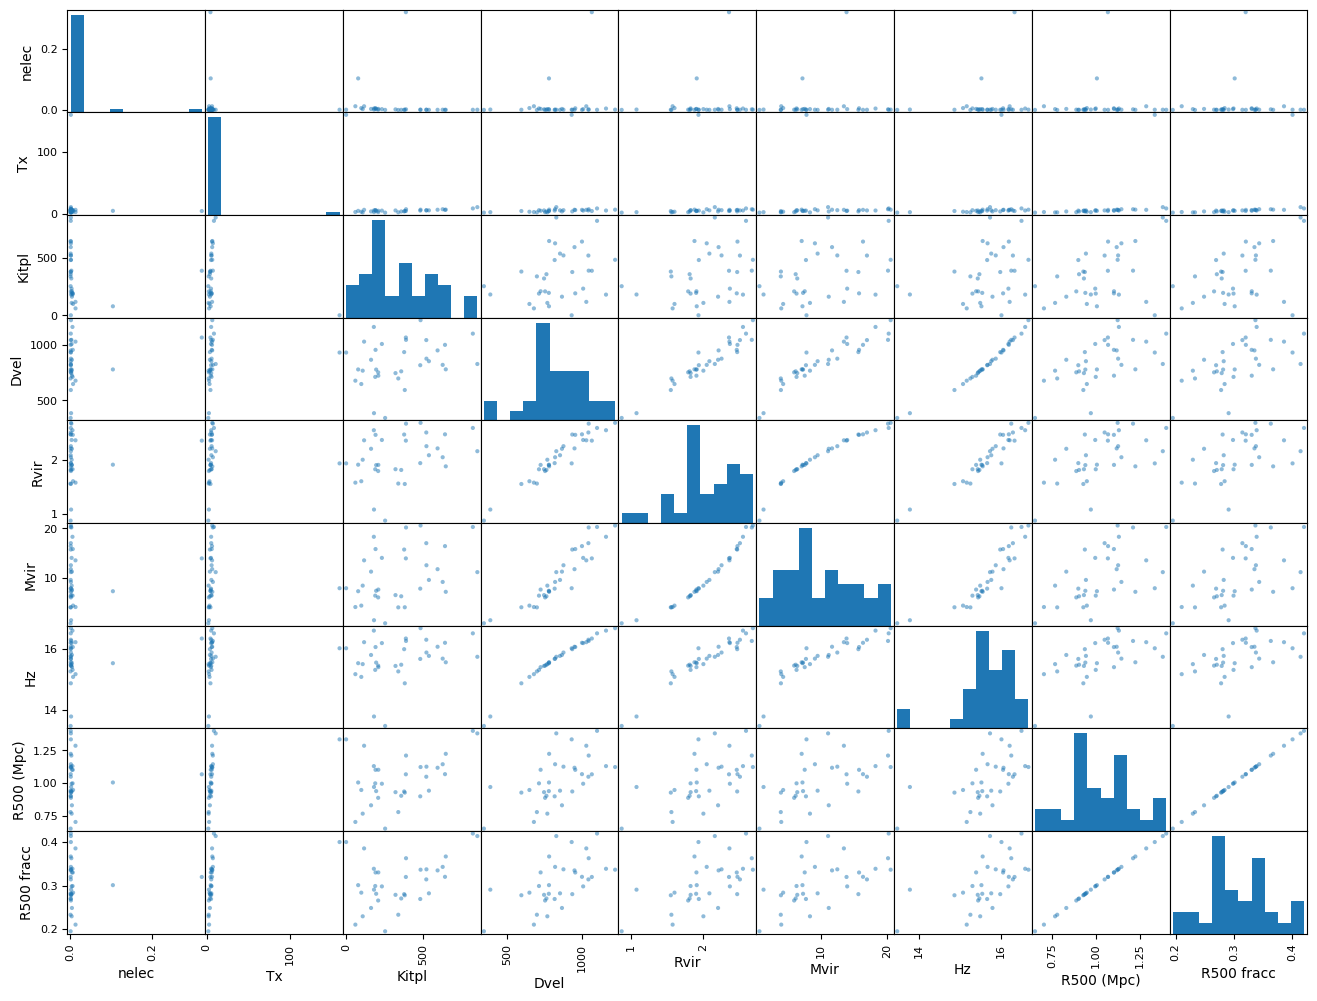

In [11]:
# Gráficos de dispersión
plt.figure(figsize=(16, 12))
scatter_matrix = pd.plotting.scatter_matrix(data[['nelec', 'Tx', 'Kitpl', 'Dvel', 'Rvir', 'Mvir', 'Hz', 'R500 (Mpc)', 'R500 fracc']], figsize=(16, 12))
plt.show()


In [4]:
# Calcular el rango intercuartílico (IQR) para cada columna
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral para identificar outliers
threshold = 1.5

# Encontrar los índices de los outliers
outliers_indices = ((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)

# Eliminar filas que contienen outliers
data_cleaned = data[~outliers_indices]

# Mostrar las filas eliminadas
print("Filas eliminadas (outliers):")
print(data[outliers_indices])

# Mostrar el conjunto de datos limpio sin outliers
print("\nConjunto de datos limpio:")
print(data_cleaned)

Filas eliminadas (outliers):
                          Name  R X-ray     nelec         neerr      Tx  \
1   ABELL_0119                   0.2830  0.001010  6.370000e-04    5.73   
4   ABELL_0400                   0.1950  0.000837  4.490000e-05    2.12   
5   ABELL_0426                   0.1160  0.012700  3.460000e-05    6.58   
10  ABELL_1060                   0.0561  0.012800  9.470000e-05    3.05   
14  ABELL_1736                   0.2720  0.001990  1.070000e-04    2.83   
16  ABELL_2029                   0.4040  0.001430  7.870000e-05  159.00   
20  ABELL_2142                   0.4000  0.001450  5.650000e-07   10.90   
23  ABELL_2199                   0.1040  0.104000  1.510000e-02    4.93   
28  ABELL_3158                   0.3150  0.321000  1.290000e-03    4.65   

    Txerr    Kitpl  Dvel   Rvir   Mvir  A     Hz  R500 (Mpc)  R500 fracc  
1    0.731  536.00   853  2.082   9.51  S  15.77      0.9413     0.28239  
4    0.148  253.00   343  0.870   0.68  S  13.47      0.6505     0.195

<ipython-input-4-c9259dd10508>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-4-c9259dd10508>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-4-c9259dd10508>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_indices = ((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)


<Figure size 1600x1200 with 0 Axes>

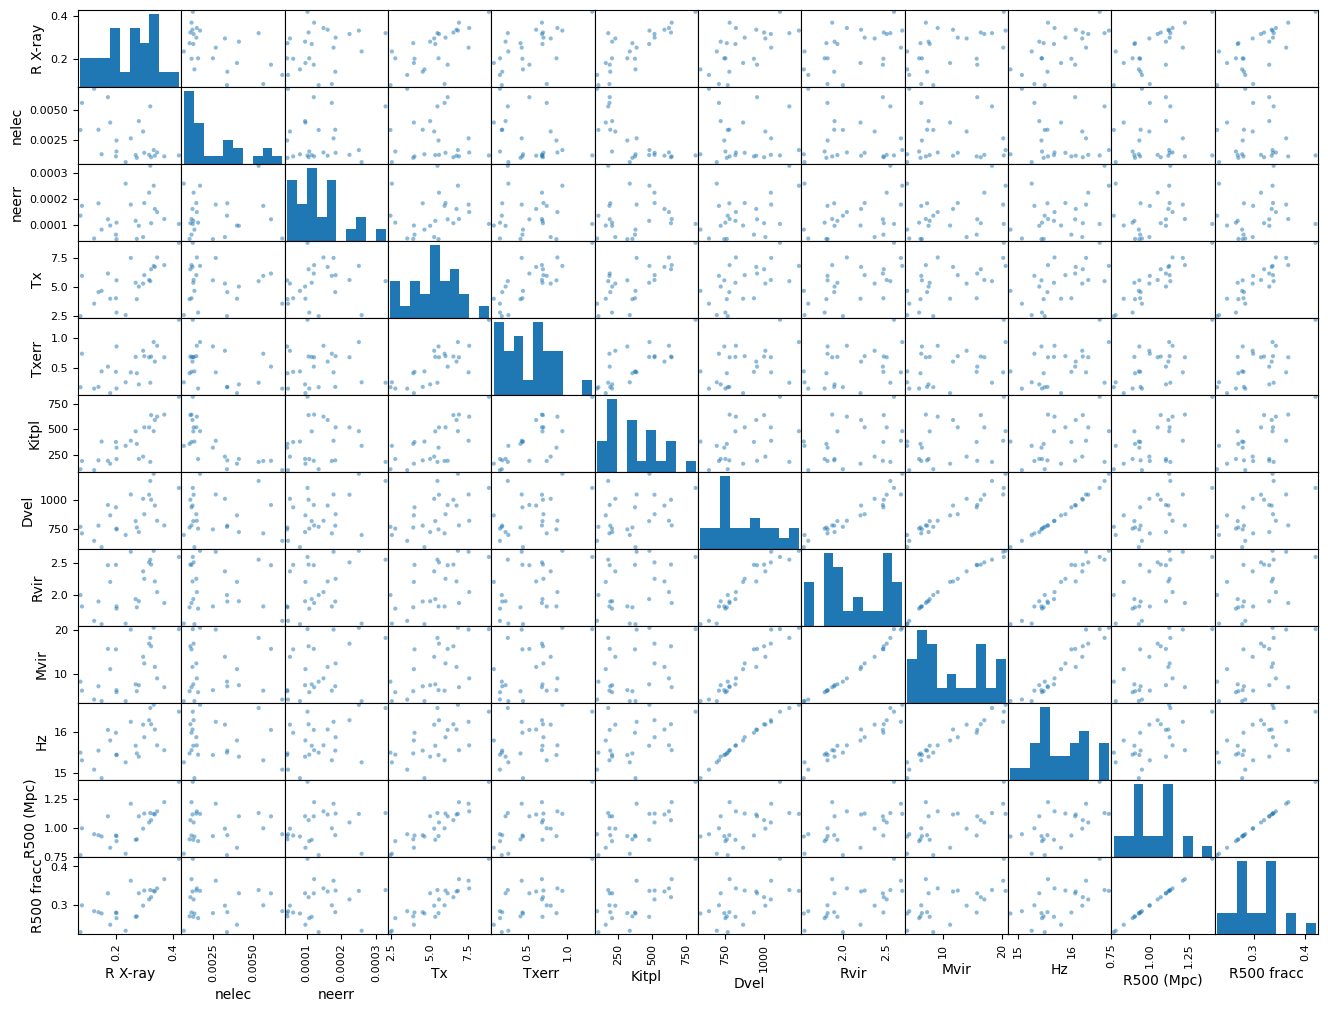

In [18]:
# Gráficos de dispersión
plt.figure(figsize=(16, 12))
scatter_matrix = pd.plotting.scatter_matrix(data_cleaned, figsize=(16, 12))
plt.show()



Matriz de correlación:


<ipython-input-7-57af16ae4d67>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned.corr(), annot=True, cmap="YlGnBu")


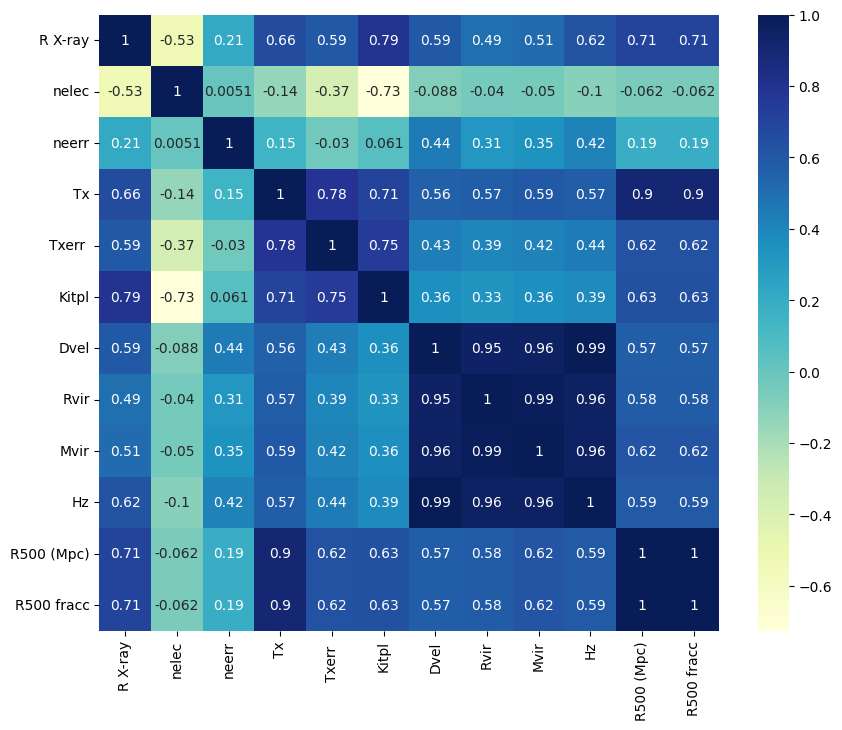

In [7]:
# Matriz de correlación
print("\nMatriz de correlación:")
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="YlGnBu")
plt.show()

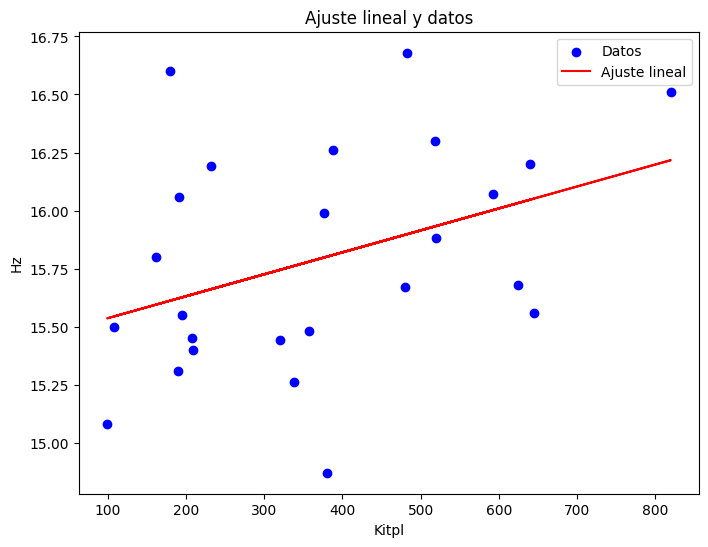

Coeficiente de determinación (R^2): 0.14937040299913942
Pendiente: 0.0009452009494135123
Intercepción: 15.441690389330915


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def correlation_and_linear_fit(data_cleaned, Kitpl, Hz):
    # Extraer las columnas del DataFrame
    x = data_cleaned[Kitpl]
    y = data_cleaned[Hz]

    # Realizar el ajuste lineal
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Calcular el coeficiente de determinación (R^2)
    r_squared = r_value**2

    # Graficar el ajuste lineal
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos')
    plt.plot(x, slope*x + intercept, color='red', label='Ajuste lineal')
    plt.xlabel(Kitpl)
    plt.ylabel(Hz)
    plt.title('Ajuste lineal y datos')
    plt.legend()
    plt.show()

    return r_squared, slope, intercept

# Ejemplo de uso
r_squared, slope, intercept = correlation_and_linear_fit(data_cleaned, 'Kitpl', 'Hz')
print("Coeficiente de determinación (R^2):", r_squared)
print("Pendiente:", slope)
print("Intercepción:", intercept)


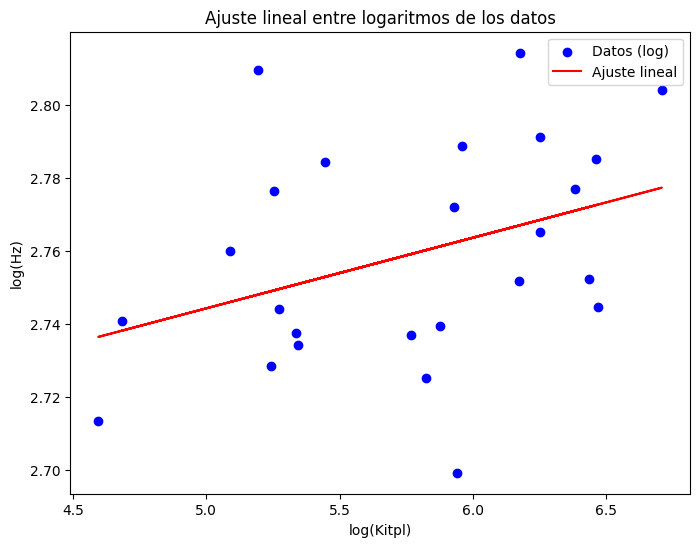

Coeficiente de determinación (R^2) con logaritmos: 0.13788967038531866
Pendiente con logaritmos: 0.019302746827882702
Intercepción con logaritmos: 2.6477972318410603


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def correlation_and_linear_fit_log(data_cleaned, Kitpl, Hz):
    # Extraer las columnas del DataFrame
    x = np.log(data_cleaned[Kitpl])
    y = np.log(data_cleaned[Hz])

    # Realizar el ajuste lineal
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Calcular el coeficiente de determinación (R^2)
    r_squared = r_value**2

    # Graficar el ajuste lineal
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos (log)')
    plt.plot(x, slope*x + intercept, color='red', label='Ajuste lineal')
    plt.xlabel(f'log({Kitpl})')
    plt.ylabel(f'log({Hz})')
    plt.title('Ajuste lineal entre logaritmos de los datos')
    plt.legend()
    plt.show()

    return r_squared, slope, intercept

# Ejemplo de uso
r_squared_log, slope_log, intercept_log = correlation_and_linear_fit_log(data_cleaned, 'Kitpl', 'Hz')
print("Coeficiente de determinación (R^2) con logaritmos:", r_squared_log)
print("Pendiente con logaritmos:", slope_log)
print("Intercepción con logaritmos:", intercept_log)


In [ ]:
# Análisis de Componentes Principales (PCA)
numeric_cols = data.select_dtypes(include=['number']).columns
X = data[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)


Varianza explicada por cada componente principal:
[0.45936056 0.19215807 0.13140188 0.09474667 0.05924389]


In [ ]:
# Clustering (K-means)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
data['cluster'] = labels
print("\nCentros de los clusters:")
print(kmeans.cluster_centers_)


Centros de los clusters:
[[ 0.54961875  0.10963987 -0.148748   -0.12543068 -0.04720871  0.60879297
   0.71873783  0.75579337  0.79205418  0.66550606  0.61393472  0.61393472]
 [-0.68477967 -0.10094513  0.17121124 -0.22483822 -0.29825887 -0.547545
  -0.79239313 -0.78702321 -0.81421181 -0.73937854 -0.76039703 -0.76039703]
 [ 1.61295598 -0.24875582 -0.21066379  5.72973296  5.57469007 -1.58876047
   0.45974701 -0.25611603 -0.43753211  0.51645362  1.72946234  1.72946234]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
